# Indice

- [⚡ 0.- Introduccion](#0--introduccion)
  - [0.1.- Composicion del repositorio](#01--composicion-del-repositorio)

- [📦 1.- Instalar librerias necesarias](#1--instalar-librerias-necesarias)

- [📥 2.- Iniciar sesion Spark, Carga de dataset e Informacion de dataset](#2--iniciar-sesion-spark-carga-de-dataset-e-informacion-de-dataset)
  - [2.1.- Iniciar sesion Spark](#21--iniciar-sesion-spark)
  - [2.2.- Carga de dataset](#22--carga-de-dataset)
  - [2.3.- Informacion acerca del dataset](#23--informacion-acerca-del-dataset)

- [🛠 3. Analisis de datos](#3--analisis-de-datos)
  - [3.1.- Matriz de correlaciones (Matrix Correlation)](#31--matriz-de-correlaciones-matrix-correlation)
  - [3.2.- Operaciones SQL](#32--operaciones-sql)

- [🧹 4.- Limpieza de datos](#4--limpieza-de-datos)

- [⚙️ 5.- Ingenieria de funciones](#5--ingenieria-de-funciones)

- [📈 6.- Modelo 1: Logistic Regression (Machine Learning)](#6--modelo-1-logistic-regression-machine-learning)

- [🌳 7.- Modelo 2: Random Forest (Machine Learning)](#7--modelo-2-random-forest-machine-learning)

- [🚀 8.- Modelo 3: Gradient Boosting (Machine Learning)](#8--modelo-3-gradient-boosting-machine-learning)

- [🔥 9.- Modelo 4: XGBoost (Machine Learning)](#9--modelo-4-xgboost-machine-learning)

- [🧠 10. Modelo 5: Redes Neuronales Artificiales (ANN) (Deep Learning)](#10--modelo-5-redes-neuronales-artificiales-ann-deep-learning)

- [🌌 11. Modelo 6: Redes Neuronales Profundas (DNN) (Deep Learning)](#11--modelo-6-redes-neuronales-profundas-dnn-deep-learning)

- [📜 12. Modelo 7: Redes Neuronales Recurrentes (RNN) (Deep Learning)](#12--modelo-7-redes-neuronales-recurrentes-rnn-deep-learning)

- [🌐 13. Modelo 8: Redes Neuronales Convolucionales (CNN) (Deep Learning)](#13--modelo-8-redes-neuronales-convolucionales-cnn-deep-learning)

- [📊 14.- Comparacion de modelos](#14--comparacion-de-modelos)
  - [Recomendaciones](#recomendaciones)
  - [Conclusiones](#conclusiones)
  - [Recomendaciones](#recomendaciones)

# ⚡ 0.- Introduccion

El objetivo de este proyecto es demostrar el uso de PySpark junto con 8 modelos de Machine Learning y Deep Learning para predecir la aprobación de préstamos. El proyecto incluirá los siguientes pasos:

- 1- Extracción de datos: Recopilación de datos relacionados con la aprobación de préstamos, incluyendo características tales como ingresos, puntuación de crédito, importe del préstamo y estado del préstamo.

- 2- Análisis de datos: Tras un análisis de datos, se ha realizado matriz de correlaciones y Operaciones de SQL.

- 3- Limpieza y preaparación de datos: Garantizar que el conjunto de datos esté listo para su uso en algoritmos de Machine Learning y Deep Learning.

- 4- Ingeniería de funciones o caracteríssticas (Features): Selección e ingeniería de características relevantes para mejorar la precisión del modelo.

- 5- Elaboración de los 8 modelos: Estos modelos se van a entrenar y evaluar con el fin de generar predicciones de si un préstamos será aprobado o no basándose en las características de entrada o inputs.

El resultado final será una comparación de los indicadores de los 8 modelos de que puede predecir con precisión la aprobación de préstamos basándose en varias características. 
El proyecto puede ampliarse explorando diferentes algoritmos y mejorando la precisión de modelos.

El conjunto de datos se puede descargar del siguiente enlace:

https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset



## 0.1.- Composicion del repositorio

Este repositorio está compuesto por los siguientes documentos:

Documento principal (documento presente) en formato ipynb:

- Loan_Prediction_Pyspark_8_models.ipynb

Documentos dentro de Data en formato CSV:

- Loan_Prediction_Dataset.csv

Y por último, el README:




# 📦 1.- Instalar librerias necesarias

Importación de módulos de PySpark

In [ ]:
import pyspark
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import pyspark.sql as sparksql
from pyspark.ml.feature import VectorAssembler, OneHotEncoder, StringIndexer, StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier, MultilayerPerceptronClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

Importación de módulos de visualización y análisis de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Importación de módulos de scikit-learn para métricas

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

Importación del módulo XGBoost

In [ ]:
import xgboost as xgb

Aparte

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import time

In [9]:
start_time = time.time()

# 📥 2.- Iniciar sesion Spark, Carga de dataset e Informacion de dataset

## 2.1.- Iniciar sesion Spark

In [10]:
spark = SparkSession.builder.appName('loan_prediction').getOrCreate()

In [11]:
spark

## 2.2.- Carga de dataset

El dataset proviene del siguiente link:

https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset

Viene bajo el siguiente nombre:

test_Y3wMUE5_7gLdaTN.csv

Cambiamos el nombre del dataset a:

Loan_Prediction_Dataset.csv

Lo metemos en la carpeta de "Data" de este repositorio

In [12]:
dataset = spark.read.csv("./Data/Loan_Prediction_Dataset.csv", header=True, sep=',', inferSchema=True)

## 2.3.- Informacion acerca del dataset

Número de filas del dataset

In [13]:
dataset.count()

614

Número de columnas del dataset

In [14]:
len(dataset.columns)

13

In [15]:
dataset.show(10)

+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
| Loan_ID|Gender|Married|Dependents|   Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|
+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
|LP001002|  Male|     No|         0|    Graduate|           No|           5849|              0.0|      NULL|             360|             1|        Urban|          Y|
|LP001003|  Male|    Yes|         1|    Graduate|           No|           4583|           1508.0|       128|             360|             1|        Rural|          N|
|LP001005|  Male|    Yes|         0|    Graduate|          Yes|           3000|              0.0|        66|             360|             1|        Urban|          Y

Esquema del DataFrame

Muestra los nombres de las columnas y sus tipos de datos.

In [16]:
dataset.printSchema()

root
 |-- Loan_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Married: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Self_Employed: string (nullable = true)
 |-- ApplicantIncome: integer (nullable = true)
 |-- CoapplicantIncome: double (nullable = true)
 |-- LoanAmount: integer (nullable = true)
 |-- Loan_Amount_Term: integer (nullable = true)
 |-- Credit_History: integer (nullable = true)
 |-- Property_Area: string (nullable = true)
 |-- Loan_Status: string (nullable = true)



Lista de tuplas que contienen el nombre de las columnas y sus tipos de datos correspondientes

In [17]:
dataset.dtypes

[('Loan_ID', 'string'),
 ('Gender', 'string'),
 ('Married', 'string'),
 ('Dependents', 'string'),
 ('Education', 'string'),
 ('Self_Employed', 'string'),
 ('ApplicantIncome', 'int'),
 ('CoapplicantIncome', 'double'),
 ('LoanAmount', 'int'),
 ('Loan_Amount_Term', 'int'),
 ('Credit_History', 'int'),
 ('Property_Area', 'string'),
 ('Loan_Status', 'string')]

Estructura del DataFrame

Muestra un resumen de las columnas, su tipo de datos y si contienen nulos.

In [18]:
dataset.summary().show()

+-------+--------+------+-------+------------------+------------+-------------+-----------------+------------------+------------------+-----------------+------------------+-------------+-----------+
|summary| Loan_ID|Gender|Married|        Dependents|   Education|Self_Employed|  ApplicantIncome| CoapplicantIncome|        LoanAmount| Loan_Amount_Term|    Credit_History|Property_Area|Loan_Status|
+-------+--------+------+-------+------------------+------------+-------------+-----------------+------------------+------------------+-----------------+------------------+-------------+-----------+
|  count|     614|   601|    611|               599|         614|          582|              614|               614|               592|              600|               564|          614|        614|
|   mean|    NULL|  NULL|   NULL|0.5547445255474452|        NULL|         NULL|5403.459283387622| 1621.245798027101|146.41216216216216|            342.0|0.8421985815602837|         NULL|       NULL|
| std

Resumen estadístico

Puedes obtener un resumen estadístico de las columnas numéricas del DataFrame.

In [19]:
dataset.describe().show()

+-------+--------+------+-------+------------------+------------+-------------+-----------------+------------------+------------------+-----------------+------------------+-------------+-----------+
|summary| Loan_ID|Gender|Married|        Dependents|   Education|Self_Employed|  ApplicantIncome| CoapplicantIncome|        LoanAmount| Loan_Amount_Term|    Credit_History|Property_Area|Loan_Status|
+-------+--------+------+-------+------------------+------------+-------------+-----------------+------------------+------------------+-----------------+------------------+-------------+-----------+
|  count|     614|   601|    611|               599|         614|          582|              614|               614|               592|              600|               564|          614|        614|
|   mean|    NULL|  NULL|   NULL|0.5547445255474452|        NULL|         NULL|5403.459283387622| 1621.245798027101|146.41216216216216|            342.0|0.8421985815602837|         NULL|       NULL|
| std

Convertir de dataframe Spark a dataframe pandas

In [20]:
dataset_pandas = dataset.toPandas()

Se recomienda abrir con la extensión Data Wrangler

In [21]:
dataset_pandas

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# 🛠  3. Analisis de datos

visualización de count basado en loan status

In [22]:
dataset.groupBy('Loan_Status').count().show()

+-----------+-----+
|Loan_Status|count|
+-----------+-----+
|          Y|  422|
|          N|  192|
+-----------+-----+



In [23]:
dataset.select("Credit_History", "Loan_Status").groupBy('Loan_Status').agg(F.avg('Credit_History')).show()

+-----------+-------------------+
|Loan_Status|avg(Credit_History)|
+-----------+-------------------+
|          Y| 0.9818181818181818|
|          N| 0.5418994413407822|
+-----------+-------------------+



In [24]:
dataset.select('Gender', 'Loan_Status').groupBy('Loan_Status', 'Gender').count().show()

+-----------+------+-----+
|Loan_Status|Gender|count|
+-----------+------+-----+
|          N|Female|   37|
|          Y|  NULL|    8|
|          Y|Female|   75|
|          N|  NULL|    5|
|          Y|  Male|  339|
|          N|  Male|  150|
+-----------+------+-----+



## 3.1.- Matriz de correlaciones (Matrix Correlation)

In [26]:
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

corr_dataset = pd.DataFrame()
for i in columns:
    corr = []
    for j in columns:
        corr.append(round(dataset.stat.corr(i, j), 2))
    corr_dataset = pd.concat([corr_dataset, pd.Series(corr)], axis=1)

corr_dataset.columns = columns
corr_dataset.insert(0, '', columns)
corr_dataset.set_index('')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
,,,,,
ApplicantIncome,1.00,-0.12,0.54,-0.02,0.01
CoapplicantIncome,-0.12,1.00,0.19,-0.05,-0.06
LoanAmount,0.54,0.19,1.00,0.06,-0.03
Loan_Amount_Term,-0.02,-0.05,0.06,1.00,0.05
Credit_History,0.01,-0.06,-0.03,0.05,1.00


Convertir la matriz a formato adecuado para heatmap

In [27]:
corr_matrix = corr_dataset.set_index('').astype(float)

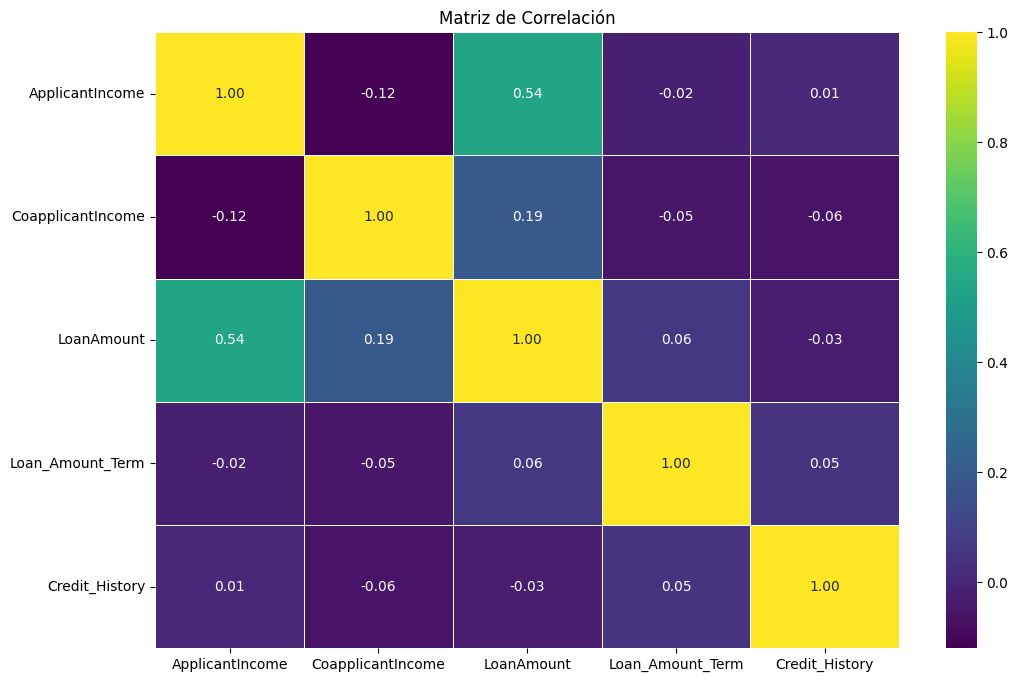

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=.5, fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

## 3.2.- Operaciones SQL

En esta sección, se van a plantear unas consultas SQL:

In [30]:
dataset.createOrReplaceTempView('table')

mostrar las filas superiores de table

In [31]:
spark.sql("select * from table limit 5").show()

+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
| Loan_ID|Gender|Married|Dependents|   Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|
+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
|LP001002|  Male|     No|         0|    Graduate|           No|           5849|              0.0|      NULL|             360|             1|        Urban|          Y|
|LP001003|  Male|    Yes|         1|    Graduate|           No|           4583|           1508.0|       128|             360|             1|        Rural|          N|
|LP001005|  Male|    Yes|         0|    Graduate|          Yes|           3000|              0.0|        66|             360|             1|        Urban|          Y

Selecciona todas las filas del DataFrame temporal table donde la columna Credit_History es igual a 1

In [32]:
spark.sql('select Loan_ID from table where Credit_History=1').show()

+--------+
| Loan_ID|
+--------+
|LP001002|
|LP001003|
|LP001005|
|LP001006|
|LP001008|
|LP001011|
|LP001013|
|LP001018|
|LP001020|
|LP001024|
|LP001027|
|LP001028|
|LP001029|
|LP001030|
|LP001032|
|LP001038|
|LP001041|
|LP001046|
|LP001066|
|LP001068|
+--------+
only showing top 20 rows



Promedio de ingresos del solicitante por área de la propiedad:

In [33]:
spark.sql("""
    SELECT Property_Area, AVG(ApplicantIncome) as Avg_ApplicantIncome
    FROM table
    GROUP BY Property_Area
""").show()

+-------------+-------------------+
|Property_Area|Avg_ApplicantIncome|
+-------------+-------------------+
|        Urban|  5398.247524752475|
|    Semiurban|  5292.261802575107|
|        Rural|  5554.083798882682|
+-------------+-------------------+



Cantidad de préstamos aprobados y rechazados por género:

In [34]:
spark.sql("""
    SELECT Gender, Loan_Status, COUNT(*) as Count
    FROM table
    GROUP BY Gender, Loan_Status
""").show()

+------+-----------+-----+
|Gender|Loan_Status|Count|
+------+-----------+-----+
|Female|          N|   37|
|  Male|          Y|  339|
|  NULL|          Y|    8|
|  NULL|          N|    5|
|  Male|          N|  150|
|Female|          Y|   75|
+------+-----------+-----+



Ingresos promedio del solicitante y co-solicitante por estado civil:

In [35]:
spark.sql("""
    SELECT Married, AVG(ApplicantIncome) as Avg_ApplicantIncome, AVG(CoapplicantIncome) as Avg_CoapplicantIncome
    FROM table
    GROUP BY Married
""").show()

+-------+-------------------+---------------------+
|Married|Avg_ApplicantIncome|Avg_CoapplicantIncome|
+-------+-------------------+---------------------+
|   NULL|             6207.0|   251.33333333333334|
|     No|  4970.384976525822|   1316.5586854460093|
|    Yes|  5629.173366834171|    1794.632964795578|
+-------+-------------------+---------------------+



Distribución de préstamos por estado de propiedad. Muestra cuántos préstamos hay en cada área de propiedad.

In [36]:
spark.sql("""
    SELECT Property_Area, COUNT(*) as Loan_Count
    FROM table
    GROUP BY Property_Area
""").show()

+-------------+----------+
|Property_Area|Loan_Count|
+-------------+----------+
|        Urban|       202|
|    Semiurban|       233|
|        Rural|       179|
+-------------+----------+



Promedio de monto de préstamo por nivel educativo. Muestra el monto promedio del préstamo basado en el nivel educativo del solicitante.

In [37]:
spark.sql("""
    SELECT Education, AVG(LoanAmount) as Avg_LoanAmount
    FROM table
    GROUP BY Education
""").show()

+------------+------------------+
|   Education|    Avg_LoanAmount|
+------------+------------------+
|Not Graduate|118.40944881889764|
|    Graduate|154.06021505376344|
+------------+------------------+



Cantidad de préstamos según el estado civil y el historial crediticio. Muestra si el estado civil y el historial crediticio afectan la cantidad de préstamos otorgados.

In [38]:
spark.sql("""
    SELECT Married, Credit_History, COUNT(*) as Loan_Count
    FROM table
    GROUP BY Married, Credit_History
""").show()

+-------+--------------+----------+
|Married|Credit_History|Loan_Count|
+-------+--------------+----------+
|    Yes|             0|        57|
|     No|             1|       167|
|   NULL|             1|         3|
|    Yes|             1|       305|
|     No|          NULL|        14|
|    Yes|          NULL|        36|
|     No|             0|        32|
+-------+--------------+----------+



Promedio del monto del préstamo por número de dependientes. Muestra el monto promedio del préstamo basado en el número de dependientes del solicitante.

In [39]:
spark.sql("""
    SELECT Dependents, AVG(LoanAmount) as Avg_LoanAmount
    FROM table
    GROUP BY Dependents
""").show()

+----------+------------------+
|Dependents|    Avg_LoanAmount|
+----------+------------------+
|         0|135.88622754491018|
|      NULL| 128.3846153846154|
|         1|158.62244897959184|
|        3+|190.89795918367346|
|         2|150.22448979591837|
+----------+------------------+



Promedio de ingresos del solicitante por tipo de empleo. Muestra el ingreso promedio del solicitante basado en si el solicitante es autónomo o no.

In [40]:
spark.sql("""
    SELECT Self_Employed, AVG(ApplicantIncome) as Avg_ApplicantIncome
    FROM table
    GROUP BY Self_Employed
""").show()

+-------------+-------------------+
|Self_Employed|Avg_ApplicantIncome|
+-------------+-------------------+
|         NULL|         5863.21875|
|           No|           5049.748|
|          Yes|  7380.817073170731|
+-------------+-------------------+



Relación entre ingresos del solicitante y estado del préstamo. Muestra la relación entre los ingresos del solicitante y el estado del préstamo (aprobado o no).

In [41]:
spark.sql("""
    SELECT Loan_Status, AVG(ApplicantIncome) as Avg_ApplicantIncome
    FROM table
    GROUP BY Loan_Status
""").show()

+-----------+-------------------+
|Loan_Status|Avg_ApplicantIncome|
+-----------+-------------------+
|          Y|  5384.068720379147|
|          N|        5446.078125|
+-----------+-------------------+



# 🧹 4.- Limpieza de datos

Mostrar valores nulos (Null) por columna

In [42]:
dataset.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in dataset.columns]).show()

+-------+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
|Loan_ID|Gender|Married|Dependents|Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|
+-------+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
|      0|    13|      3|        15|        0|           32|              0|                0|        22|              14|            50|            0|          0|
+-------+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+



Obtener el valor medio de la columna

In [43]:
mean = dataset.select(F.mean(dataset['LoanAmount'])).collect()[0][0]
mean

146.41216216216216

Rellenar valor nulo (Null)

In [44]:
dataset = dataset.na.fill(mean, ['LoanAmount'])

Obtener el valor de modo de la columna

In [45]:
dataset.groupby('Gender').count().orderBy("count", ascending=False).first()[0]

'Male'

Rellenar valores nulos (Null) para todas las columnas

In [46]:
numerical_cols = ['LoanAmount', 'Loan_Amount_Term']

In [47]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']

In [48]:
for col in numerical_cols:
    mean = dataset.select(F.mean(dataset[col])).collect()[0][0]
    dataset = dataset.na.fill(mean, [col])

In [49]:
for col in categorical_cols:
    mode = dataset.groupby(col).count().orderBy("count", ascending=False).first()[0]
    dataset = dataset.na.fill(mode, [col])

Mostrar valores nulos (Null) de nuevo

In [50]:
dataset.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in dataset.columns]).show()

+-------+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
|Loan_ID|Gender|Married|Dependents|Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|
+-------+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
|      0|     0|      0|         0|        0|            0|              0|                0|         0|               0|             0|            0|          0|
+-------+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+



Crear nueva columna de feature de Total Income

Total Income = ApplicantIncome + CoapplicantIncome

In [51]:
dataset = dataset.withColumn('TotalIncome', F.col('ApplicantIncome') + F.col('CoapplicantIncome'))
dataset.show(5)

+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+-----------+
| Loan_ID|Gender|Married|Dependents|   Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|TotalIncome|
+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+-----------+
|LP001002|  Male|     No|         0|    Graduate|           No|           5849|              0.0|       146|             360|             1|        Urban|          Y|     5849.0|
|LP001003|  Male|    Yes|         1|    Graduate|           No|           4583|           1508.0|       128|             360|             1|        Rural|          N|     6091.0|
|LP001005|  Male|    Yes|         0|    Graduate|          Yes|           3000|              0.0|        

Buscar y sustituir valores

In [52]:
dataset = dataset.withColumn('Loan_Status', F.when(dataset['Loan_Status']=='Y', 1).otherwise(0))
dataset.show(5)

+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+-----------+
| Loan_ID|Gender|Married|Dependents|   Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|TotalIncome|
+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+-----------+
|LP001002|  Male|     No|         0|    Graduate|           No|           5849|              0.0|       146|             360|             1|        Urban|          1|     5849.0|
|LP001003|  Male|    Yes|         1|    Graduate|           No|           4583|           1508.0|       128|             360|             1|        Rural|          0|     6091.0|
|LP001005|  Male|    Yes|         0|    Graduate|          Yes|           3000|              0.0|        

# ⚙️ 5.- Ingenieria de funciones

In [53]:
dataset.printSchema()

root
 |-- Loan_ID: string (nullable = true)
 |-- Gender: string (nullable = false)
 |-- Married: string (nullable = false)
 |-- Dependents: string (nullable = false)
 |-- Education: string (nullable = true)
 |-- Self_Employed: string (nullable = false)
 |-- ApplicantIncome: integer (nullable = true)
 |-- CoapplicantIncome: double (nullable = true)
 |-- LoanAmount: integer (nullable = true)
 |-- Loan_Amount_Term: integer (nullable = true)
 |-- Credit_History: integer (nullable = true)
 |-- Property_Area: string (nullable = true)
 |-- Loan_Status: integer (nullable = false)
 |-- TotalIncome: double (nullable = true)



In [55]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']

In [56]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'TotalIncome']

Indexar las columnas de cadenas

In [57]:
indexers = [StringIndexer(inputCol=col, outputCol="{0}_index".format(col)) for col in categorical_columns]

Codificar los valores indexados

In [58]:
encoders = [OneHotEncoder(dropLast=False, inputCol=indexer.getOutputCol(), outputCol="{0}_encoded".format(indexer.getOutputCol()))
           for indexer in indexers]

In [59]:
input_columns = [encoder.getOutputCol() for encoder in encoders] + numerical_columns

Vectorizar los valores codificados

In [60]:
assembler = VectorAssembler(inputCols=input_columns, outputCol="feature")

Crear el pipeline para transformar los datos

In [61]:
pipeline = Pipeline(stages = indexers + encoders + [assembler])

In [62]:
dataset_model = pipeline.fit(dataset)

In [63]:
transformed_dataset = dataset_model.transform(dataset)

In [64]:
transformed_dataset.show(5)

+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+-----------+------------+-------------+----------------+---------------+-------------------+-------------------+--------------------+--------------------+---------------------+------------------------+-----------------------+---------------------------+---------------------------+----------------------------+--------------------+
| Loan_ID|Gender|Married|Dependents|   Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|TotalIncome|Gender_index|Married_index|Dependents_index|Education_index|Self_Employed_index|Property_Area_index|Credit_History_index|Gender_index_encoded|Married_index_encoded|Dependents_index_encoded|Education_index_encoded|Self_Employed_index_encoded|Property_Area_index_encoded|Credit_History_index_encoded|             feature|
+---

obtener característica (feature) de entrada y columnas de salida

In [65]:
transformed_dataset = transformed_dataset.select(['feature', 'Loan_Status'])

Dividir los datos para entrenamiento (train) y prueba (test)

Por defecto, train 80 % test 20 %

In [66]:
train_data, test_data = transformed_dataset.randomSplit([0.8, 0.2], seed=42)

In [67]:
train_data.show(5)

+--------------------+-----------+
|             feature|Loan_Status|
+--------------------+-----------+
|(22,[0,2,4,8,10,1...|          1|
|(22,[0,2,4,8,10,1...|          1|
|(22,[0,2,4,8,10,1...|          0|
|(22,[0,2,4,8,10,1...|          1|
|(22,[0,2,4,8,10,1...|          1|
+--------------------+-----------+
only showing top 5 rows



# 📈 6.- Modelo 1: Logistic Regression (Machine Learning)

Paso 1- Crear y ajustar el modelo de Regresión Logística

Crear el modelo de regresión logística

In [188]:
lr = LogisticRegression(featuresCol='feature', labelCol='Loan_Status')

Crear la grid de hiperparámetros para la regresión logística

In [189]:
paramGridLR = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 1.0]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .addGrid(lr.maxIter, [50, 100, 200]) \
    .addGrid(lr.tol, [1e-6, 1e-4, 1e-2]) \
    .addGrid(lr.threshold, [0.4, 0.5, 0.6]) \
    .build()

Crear el evaluador

In [190]:
evaluator = BinaryClassificationEvaluator(labelCol='Loan_Status')

Crear el cross-validator para la regresión logística

In [191]:
crossvalLR = CrossValidator(estimator=lr,
                            estimatorParamMaps=paramGridLR,
                            evaluator=evaluator,
                            numFolds=10)

Entrenar el modelo de regresión logística usando cross-validation

In [192]:
cvModelLR = crossvalLR.fit(train_data)

Tiempo espera: 20 mins 58 seg

Paso 2- Evaluar el modelo de Regresión Logística

Evaluar el modelo de regresión logística en el conjunto de prueba

In [193]:
predictionsLR = cvModelLR.transform(test_data)

Calcular métricas adicionales

In [194]:
evaluator_multiclass = MulticlassClassificationEvaluator(labelCol='Loan_Status', metricName='accuracy')
accuracyLR = evaluator_multiclass.evaluate(predictionsLR)

evaluator_precision = MulticlassClassificationEvaluator(labelCol='Loan_Status', metricName='weightedPrecision')
precisionLR = evaluator_precision.evaluate(predictionsLR)

evaluator_recall = MulticlassClassificationEvaluator(labelCol='Loan_Status', metricName='weightedRecall')
recallLR = evaluator_recall.evaluate(predictionsLR)

f1LR = evaluator_multiclass.evaluate(predictionsLR, {evaluator_multiclass.metricName: "f1"})

Extraer las probabilidades y las etiquetas reales

In [195]:
probabilitiesLR = predictionsLR.select('probability').collect()
y_true = predictionsLR.select('Loan_Status').collect()

Convertir a numpy array y asegurar que tenemos la columna correcta

In [196]:
probabilitiesLR = np.array([prob[0][1] for prob in probabilitiesLR])
y_true = np.array([label[0] for label in y_true])

Calcular AUC

In [197]:
aucLR = evaluator.evaluate(predictionsLR)

Calcular coeficiente de Gini

In [198]:
giniLR = 2 * aucLR - 1

Matriz de Confusion (Revisar esta parte de chatgpt)

In [199]:
y_pred = np.array(predictionsLR.select('prediction').collect()).flatten()
conf_matrixLR = confusion_matrix(y_true, y_pred)

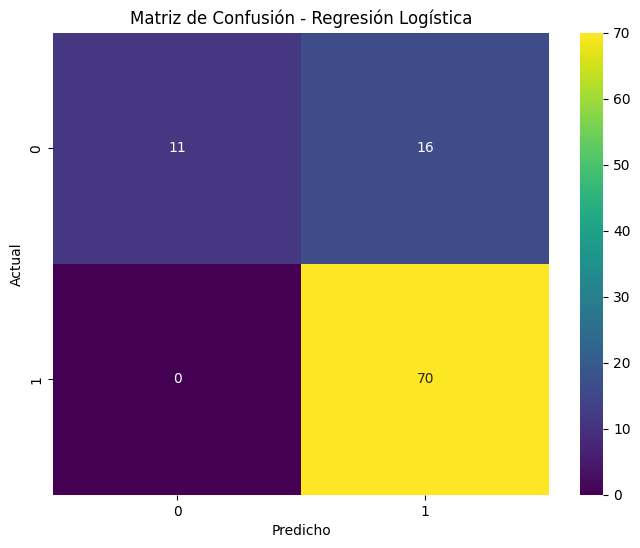

In [200]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrixLR, annot=True, fmt="d", cmap="viridis")
plt.title("Matriz de Confusión - Regresión Logística")
plt.ylabel('Actual')
plt.xlabel('Predicho')
plt.show()

Curva ROC

In [201]:
fprLR, tprLR, _ = roc_curve(y_true, probabilitiesLR)
roc_aucLR = auc(fprLR, tprLR)

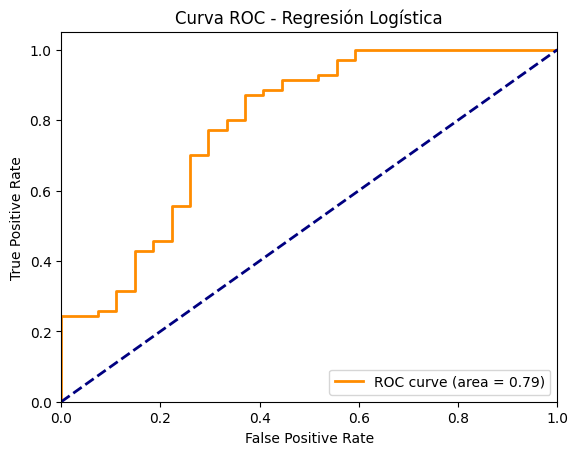

In [202]:
plt.figure()
plt.plot(fprLR, tprLR, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_aucLR)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc="lower right")
plt.show()

Almacenar resultados

In [203]:
results_lr = {
    'Modelo': 'Regresión Logística',
    'AUC': aucLR,
    'Exactitud (Accuracy)': accuracyLR,
    'Sensibilidad (Recall)': recallLR,
    'Precisión (Precision)': precisionLR,
    'Puntuación F1 (F1 Score)': f1LR,
    'Coeficiente de Gini': giniLR,
    'ROC AUC': roc_aucLR
}

Mostrar resultados

In [204]:
print(f"Modelo 1: Regresión Logística\nAUC: {aucLR}\nExactitud (Accuracy): {accuracyLR}\nSensibilidad (Recall): {recallLR}\nPrecisión (Precision): {precisionLR}\nPuntuación F1 (F1 Score): {f1LR}\nCoeficiente de Gini: {giniLR}\nROC AUC: {roc_aucLR}")

Modelo 1: Regresión Logística
AUC: 0.7873015873015874
Exactitud (Accuracy): 0.8350515463917526
Sensibilidad (Recall): 0.8350515463917526
Precisión (Precision): 0.8657396307839846
Puntuación F1 (F1 Score): 0.8087844512152704
Coeficiente de Gini: 0.5746031746031748
ROC AUC: 0.7873015873015874


cuando ves que AUC y ROC AUC tienen el mismo valor, esto indica que ambos cálculos han sido realizados correctamente y están midiendo lo mismo.

# 🌳 7.- Modelo 2: Random Forest (Machine Learning)

Paso 1- Crear y ajustar el modelo de Random Forest

Crear el modelo

In [206]:
rf = RandomForestClassifier(featuresCol='feature', labelCol='Loan_Status')

Crear la grid de hiperparámetros para el Random Forest

In [207]:
paramGridRF = ParamGridBuilder() \
    .addGrid(rf.numTrees, [50, 100, 150]) \
    .addGrid(rf.maxDepth, [5, 10, 20]) \
    .addGrid(rf.subsamplingRate, [0.8, 1.0]) \
    .addGrid(rf.maxBins, [32, 64]) \
    .addGrid(rf.impurity, ['gini', 'entropy']) \
    .build()

Crear el evaluador

In [208]:
evaluator = BinaryClassificationEvaluator(labelCol='Loan_Status')

Crear el cross-validator para el Random Forest

In [209]:
crossvalRF = CrossValidator(estimator=rf,
                            estimatorParamMaps=paramGridRF,
                            evaluator=evaluator,
                            numFolds=10)

Entrenar el modelo de bosque aleatorio usando cross-validation

In [210]:
cvModelRF = crossvalRF.fit(train_data)

Tiempo espera: 27 mins 11 seg

Paso 2- Evaluar el modelo

Evaluar el modelo en el conjunto de prueba

In [211]:
predictionsRF = cvModelRF.transform(test_data)

Calcular métricas adicionales

In [212]:
evaluator_multiclass = MulticlassClassificationEvaluator(labelCol='Loan_Status', metricName='accuracy')
accuracyRF = evaluator_multiclass.evaluate(predictionsRF)

evaluator_precision = MulticlassClassificationEvaluator(labelCol='Loan_Status', metricName='weightedPrecision')
precisionRF = evaluator_precision.evaluate(predictionsRF)

evaluator_recall = MulticlassClassificationEvaluator(labelCol='Loan_Status', metricName='weightedRecall')
recallRF = evaluator_recall.evaluate(predictionsRF)

f1RF = evaluator_multiclass.evaluate(predictionsRF, {evaluator_multiclass.metricName: "f1"})

Extraer las probabilidades y las etiquetas reales

In [213]:
probabilitiesRF = predictionsRF.select('probability').collect()
y_true = predictionsRF.select('Loan_Status').collect()

Convertir a numpy array y asegurar que tenemos la columna correcta

In [214]:
probabilitiesRF = np.array([prob[0][1] for prob in probabilitiesRF])
y_true = np.array([label[0] for label in y_true])

Calcular AUC

In [215]:
roc_aucRF = evaluator.evaluate(predictionsRF)

Calcular Coeficiente de Gini

In [216]:
giniRF = 2 * roc_aucRF - 1

Matriz de Confusión

In [217]:
y_pred = np.array(predictionsRF.select('prediction').collect()).flatten()
conf_matrixRF = confusion_matrix(y_true, y_pred)

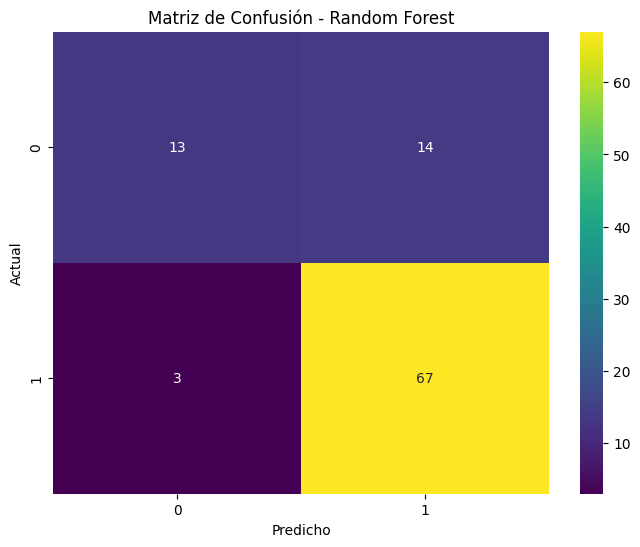

In [218]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrixRF, annot=True, fmt="d", cmap="viridis")
plt.title("Matriz de Confusión - Random Forest")
plt.ylabel('Actual')
plt.xlabel('Predicho')
plt.show()

Curva ROC

In [219]:
fprRF, tprRF, _ = roc_curve(y_true, probabilitiesRF)

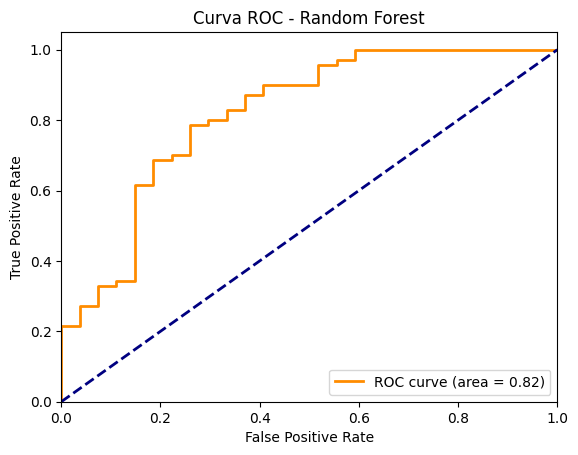

In [220]:
plt.figure()
plt.plot(fprRF, tprRF, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_aucRF)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()

Almacenar resultados

In [221]:
results_rf = {
    'Modelo': 'Random Forest',
    'AUC': roc_aucRF,
    'Exactitud (Accuracy)': accuracyRF,
    'Sensibilidad (Recall)': recallRF,
    'Precisión (Precision)': precisionRF,
    'Puntuación F1 (F1 Score)': f1RF,
    'Coeficiente de Gini': giniRF,
    'ROC AUC': roc_aucRF
}

Mostrar resultados

In [222]:
print(f"Modelo 2: Random Forest\nAUC: {roc_aucRF}\nExactitud (Accuracy): {accuracyRF}\nSensibilidad (Recall): {recallRF}\nPrecisión (Precision): {precisionRF}\nPuntuación F1 (F1 Score): {f1RF}\nCoeficiente de Gini: {giniRF}\nROC AUC: {roc_aucRF}")


Modelo 2: Random Forest
AUC: 0.8174603174603174
Exactitud (Accuracy): 0.8247422680412371
Sensibilidad (Recall): 0.8247422680412371
Precisión (Precision): 0.8230797378134148
Puntuación F1 (F1 Score): 0.8087091411686813
Coeficiente de Gini: 0.6349206349206349
ROC AUC: 0.8174603174603174


# 🚀 8.- Modelo 3: Gradient Boosting (Machine Learning)

Paso 1- Crear y ajustar el modelo de Gradient Boosting

Crear el modelo de Gradient-Boosted Trees (GBT)

In [70]:
gbt = GBTClassifier(featuresCol='feature', labelCol='Loan_Status')

Crear la grid de hiperparámetros para Gradient Boosting

In [71]:
paramGridGBT = ParamGridBuilder() \
    .addGrid(gbt.maxDepth, [5, 10, 20]) \
    .addGrid(gbt.maxIter, [10, 50, 100]) \
    .addGrid(gbt.stepSize, [0.01, 0.1, 0.3]) \
    .addGrid(gbt.subsamplingRate, [0.8, 1.0]) \
    .addGrid(gbt.minInstancesPerNode, [1, 5, 10]) \
    .build()

Crear el evaluador

In [72]:
evaluator = BinaryClassificationEvaluator(labelCol='Loan_Status')

Crear el cross-validator para Gradient Boosting

In [73]:
crossvalGBT = CrossValidator(estimator=gbt,
                             estimatorParamMaps=paramGridGBT,
                             evaluator=evaluator,
                             numFolds=10)

Entrenar el modelo de Gradient Boosting usando cross-validation

In [74]:
cvModelGBT = crossvalGBT.fit(train_data)

Tiempo espera: 932 mins

Paso 2- Evaluar el modelo de Gradient Boosting

Evaluar el modelo de Gradient Boosting en el conjunto de prueba

In [75]:
predictionsGBT = cvModelGBT.transform(test_data)

Calcular métricas adicionales

In [76]:
evaluator_multiclass = MulticlassClassificationEvaluator(labelCol='Loan_Status', metricName='accuracy')
accuracyGBT = evaluator_multiclass.evaluate(predictionsGBT)

evaluator_precision = MulticlassClassificationEvaluator(labelCol='Loan_Status', metricName='weightedPrecision')
precisionGBT = evaluator_precision.evaluate(predictionsGBT)

evaluator_recall = MulticlassClassificationEvaluator(labelCol='Loan_Status', metricName='weightedRecall')
recallGBT = evaluator_recall.evaluate(predictionsGBT)

f1GBT = evaluator_multiclass.evaluate(predictionsGBT, {evaluator_multiclass.metricName: "f1"})

Extraer las probabilidades y las etiquetas reales

In [77]:
probabilitiesGBT = predictionsGBT.select('probability').collect()
y_true = predictionsGBT.select('Loan_Status').collect()

Convertir a numpy array y asegurar que tenemos la columna correcta

In [78]:
probabilitiesGBT = np.array([prob[0][1] for prob in probabilitiesGBT])
y_true = np.array([label[0] for label in y_true])

Calcular AUC (ROC AUC)

In [79]:
roc_aucGBT = evaluator.evaluate(predictionsGBT)

Calcular Coeficiente de Gini

In [80]:
giniGBT = 2 * roc_aucGBT - 1

Matriz de Confusión

In [81]:
y_pred = np.array(predictionsGBT.select('prediction').collect()).flatten()
conf_matrixGBT = confusion_matrix(y_true, y_pred)

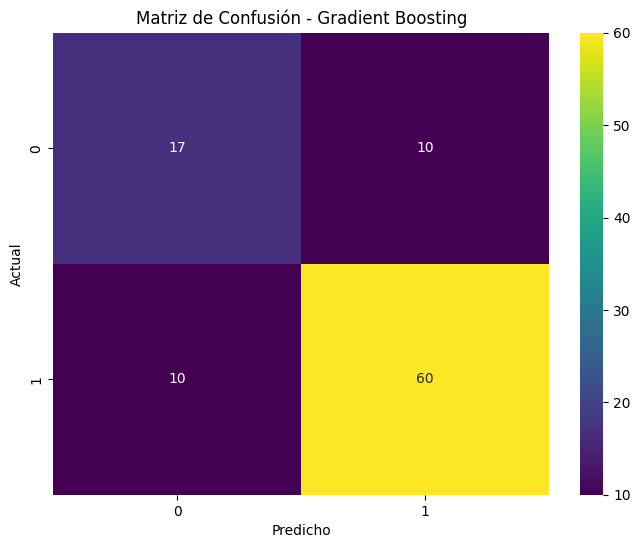

In [82]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrixGBT, annot=True, fmt="d", cmap="viridis")
plt.title("Matriz de Confusión - Gradient Boosting")
plt.ylabel('Actual')
plt.xlabel('Predicho')
plt.show()

Curva ROC

In [83]:
fprGBT, tprGBT, _ = roc_curve(y_true, probabilitiesGBT)

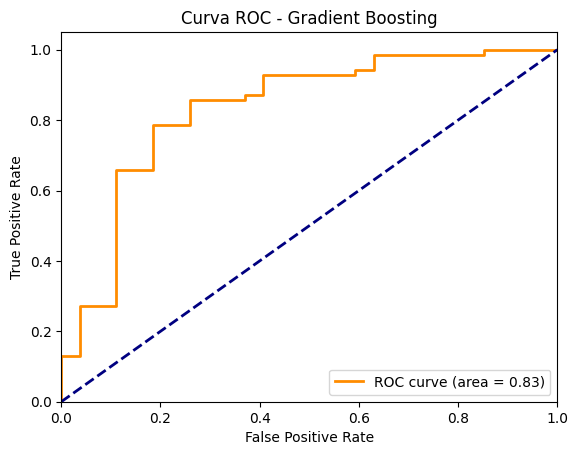

In [84]:
plt.figure()
plt.plot(fprGBT, tprGBT, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_aucGBT)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

Almacenar resultados

In [85]:
results_gbt = {
    'Modelo': 'Gradient Boosting',
    'AUC': roc_aucGBT,
    'Exactitud (Accuracy)': accuracyGBT,
    'Sensibilidad (Recall)': recallGBT,
    'Precisión (Precision)': precisionGBT,
    'Puntuación F1 (F1 Score)': f1GBT,
    'Coeficiente de Gini': giniGBT,
    'ROC AUC': roc_aucGBT
}

Mostrar resultados

In [86]:
print(f"Modelo 3: Gradient Boosting Mejorado\nAUC: {roc_aucGBT}\nExactitud (Accuracy): {accuracyGBT}\nSensibilidad (Recall): {recallGBT}\nPrecisión (Precision): {precisionGBT}\nPuntuación F1 (F1 Score): {f1GBT}\nCoeficiente de Gini: {giniGBT}\nROC AUC: {roc_aucGBT}")

Modelo 3: Gradient Boosting Mejorado
AUC: 0.8333333333333336
Exactitud (Accuracy): 0.7938144329896907
Sensibilidad (Recall): 0.7938144329896908
Precisión (Precision): 0.7938144329896908
Puntuación F1 (F1 Score): 0.7938144329896908
Coeficiente de Gini: 0.6666666666666672
ROC AUC: 0.8333333333333336


# 🔥 9.- Modelo 4: XGBoost (Machine Learning)

Paso 1- Transformar los datos a DMatrix

Función para transformar el DataFrame de Spark a DMatrix de XGBoost utilizando Pandas

In [88]:
def transform_to_dmatrix(dataset):
    # Convertir el DataFrame de Spark a un DataFrame de Pandas
    pandas_df = dataset.toPandas()
    
    # Separar características y etiquetas
    features = np.array(pandas_df['feature'].tolist())
    labels = pandas_df['Loan_Status'].values
    
    # Crear el DMatrix de XGBoost
    return xgb.DMatrix(features, label=labels), labels

Convertir los datos de entrenamiento y prueba a DMatrix

In [89]:
train_dmatrix, y_train_true = transform_to_dmatrix(train_data)
test_dmatrix, y_true = transform_to_dmatrix(test_data)

Paso 2- Crear y ajustar el modelo de XGBoost

Definir los parámetros para XGBoost

In [90]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 6,
    'eta': 0.3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'auc'
}

Definir los conjuntos de validación para early stopping

In [91]:
evals = [(train_dmatrix, 'train'), (test_dmatrix, 'eval')]

Entrenar el modelo de XGBoost

In [92]:
xgb_model = xgb.train(params, train_dmatrix, num_boost_round=200, evals=evals, early_stopping_rounds=10)

[0]	train-auc:0.85276	eval-auc:0.76217
[1]	train-auc:0.88458	eval-auc:0.76508
[2]	train-auc:0.89608	eval-auc:0.79444
[3]	train-auc:0.91835	eval-auc:0.79127
[4]	train-auc:0.93167	eval-auc:0.79709
[5]	train-auc:0.93415	eval-auc:0.79868
[6]	train-auc:0.94270	eval-auc:0.80688
[7]	train-auc:0.95203	eval-auc:0.81958
[8]	train-auc:0.96162	eval-auc:0.81693
[9]	train-auc:0.96711	eval-auc:0.80847
[10]	train-auc:0.97004	eval-auc:0.81376
[11]	train-auc:0.97352	eval-auc:0.80847
[12]	train-auc:0.97497	eval-auc:0.81799
[13]	train-auc:0.97557	eval-auc:0.81958
[14]	train-auc:0.98020	eval-auc:0.82063
[15]	train-auc:0.98153	eval-auc:0.82275
[16]	train-auc:0.98452	eval-auc:0.82275
[17]	train-auc:0.98791	eval-auc:0.82063
[18]	train-auc:0.98729	eval-auc:0.83333
[19]	train-auc:0.98821	eval-auc:0.83016
[20]	train-auc:0.99134	eval-auc:0.82698
[21]	train-auc:0.99353	eval-auc:0.82487
[22]	train-auc:0.99301	eval-auc:0.82116
[23]	train-auc:0.99389	eval-auc:0.81958
[24]	train-auc:0.99583	eval-auc:0.81481
[25]	train

Tiempo espera: 5 seg

Paso 3- Evaluar el modelo de XGBoost

Predecir en el conjunto de prueba

In [93]:
y_pred_prob = xgb_model.predict(test_dmatrix)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

Las etiquetas reales ya están recolectadas como `y_true` durante la creación del DMatrix

Calcular AUC (ROC AUC)

In [94]:
fprXGB, tprXGB, _ = roc_curve(y_true, y_pred_prob)
roc_aucXGB = auc(fprXGB, tprXGB)

Calcular Coeficiente de Gini

In [95]:
giniXGB = 2 * roc_aucXGB - 1

Matriz de Confusión

In [96]:
conf_matrixXGB = confusion_matrix(y_true, y_pred)

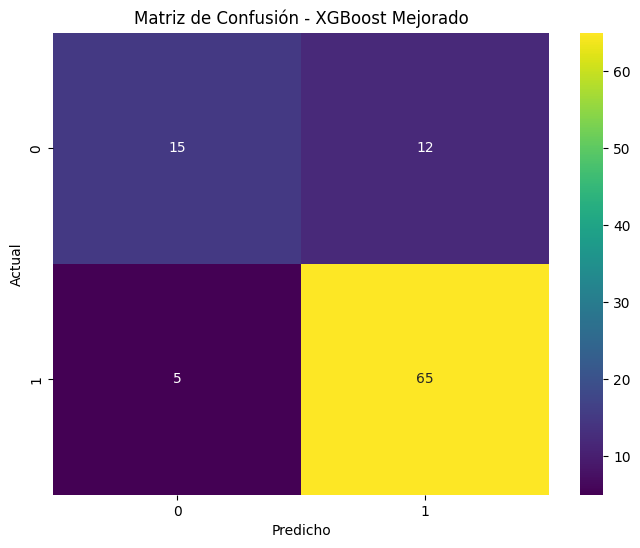

In [97]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrixXGB, annot=True, fmt="d", cmap="viridis")
plt.title("Matriz de Confusión - XGBoost Mejorado")
plt.ylabel('Actual')
plt.xlabel('Predicho')
plt.show()

Curva ROC

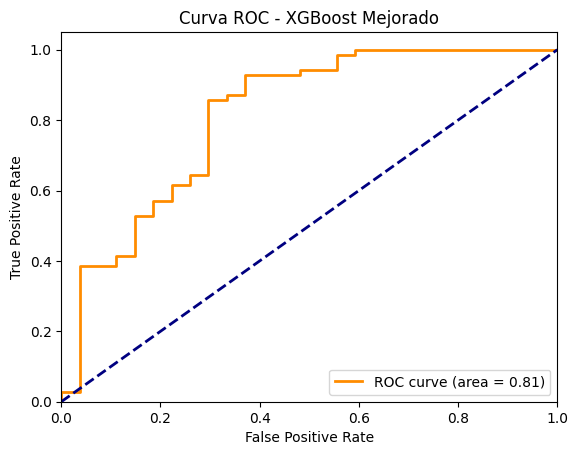

In [98]:
plt.figure()
plt.plot(fprXGB, tprXGB, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_aucXGB)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - XGBoost Mejorado')
plt.legend(loc="lower right")
plt.show()

Calcular métricas adicionales usando sklearn

In [99]:
accuracyXGB = accuracy_score(y_true, y_pred)
precisionXGB = precision_score(y_true, y_pred)
recallXGB = recall_score(y_true, y_pred)
f1XGB = f1_score(y_true, y_pred)

Almacenar resultados

In [100]:
results_xgb = {
    'Modelo': 'XGBoost Mejorado',
    'AUC': roc_aucXGB,
    'Exactitud (Accuracy)': accuracyXGB,
    'Sensibilidad (Recall)': recallXGB,
    'Precisión (Precision)': precisionXGB,
    'Puntuación F1 (F1 Score)': f1XGB,
    'Coeficiente de Gini': giniXGB
}

Mostrar resultados

In [101]:
print(f"Modelo 4: XGBoost Mejorado\nAUC: {roc_aucXGB}\nExactitud (Accuracy): {accuracyXGB}\nSensibilidad (Recall): {recallXGB}\nPrecisión (Precision): {precisionXGB}\nPuntuación F1 (F1 Score): {f1XGB}\nCoeficiente de Gini: {giniXGB}")

Modelo 4: XGBoost Mejorado
AUC: 0.8132275132275133
Exactitud (Accuracy): 0.8247422680412371
Sensibilidad (Recall): 0.9285714285714286
Precisión (Precision): 0.8441558441558441
Puntuación F1 (F1 Score): 0.8843537414965986
Coeficiente de Gini: 0.6264550264550266


# 🧠 10. Modelo 5: Redes Neuronales Artificiales (ANN) (Deep Learning)

Paso 1- Preparar los Datos

Vectorizar las características (Este paso es necesario antes de escalar)

In [108]:
assembler = VectorAssembler(inputCols=["feature"], outputCol="features")
vectorized_data = assembler.transform(transformed_dataset)

Normalizar los datos

In [109]:
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)
scalerModel = scaler.fit(vectorized_data)
scaled_data = scalerModel.transform(vectorized_data)

Dividir los datos en conjuntos de entrenamiento y prueba

In [110]:
train_data, test_data = scaled_data.randomSplit([0.8, 0.2], seed=42)

Paso 2- Definir y entrenar el modelo

Definir la Arquitectura de la Red

In [111]:
layers = [22, 128, 64, 2]  # 22 entradas, dos capas ocultas (128 y 64 neuronas) y 2 salidas (para clasificación binaria)

Inicializar el modelo de MultilayerPerceptronClassifier

In [112]:
mlp = MultilayerPerceptronClassifier(layers=layers, featuresCol='scaledFeatures', labelCol='Loan_Status', maxIter=100)

Crear la grid de hiperparámetros

In [113]:
paramGridANN = ParamGridBuilder() \
    .addGrid(mlp.maxIter, [100, 200]) \
    .addGrid(mlp.stepSize, [0.01, 0.1, 0.2]) \
    .addGrid(mlp.tol, [1e-4, 1e-5]) \
    .build()

Evaluador

In [114]:
evaluator = BinaryClassificationEvaluator(labelCol='Loan_Status')

CrossValidator

In [115]:
crossvalANN = CrossValidator(estimator=mlp,
                             estimatorParamMaps=paramGridANN,
                             evaluator=evaluator,
                             numFolds=5)

Entrenar el modelo

In [116]:
cvModelANN = crossvalANN.fit(train_data)

Tiempo espera: 6 mins 51 seg

Paso 3- Realizar Predicciones y Evaluar el Modelo

Realizar predicciones en los datos de prueba

In [117]:
predictionsANN = cvModelANN.transform(test_data)

Obtener las etiquetas reales y predichas

In [118]:
y_true = [row['Loan_Status'] for row in predictionsANN.select('Loan_Status').collect()]
y_pred_prob = [row['probability'][1] for row in predictionsANN.select('probability').collect()]
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

Calcular AUC (ROC AUC)

In [119]:
fprANN, tprANN, _ = roc_curve(y_true, y_pred_prob)
roc_aucANN = auc(fprANN, tprANN)

Calcular Coeficiente de Gini

In [120]:
giniANN = 2 * roc_aucANN - 1

Matriz de Confusión

In [121]:
conf_matrixANN = confusion_matrix(y_true, y_pred)

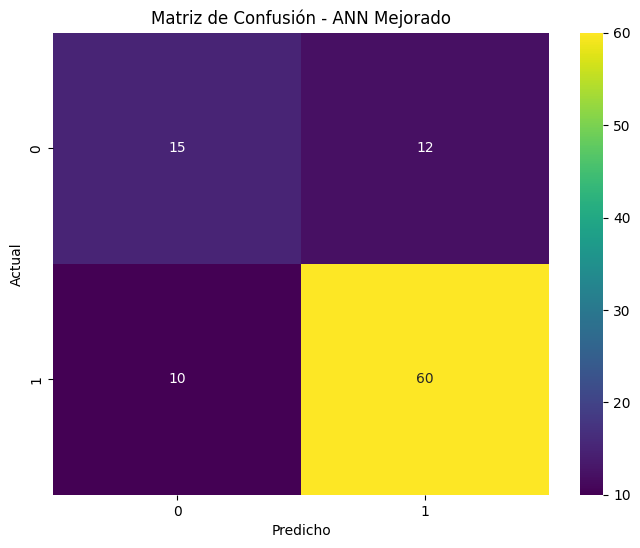

In [122]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrixANN, annot=True, fmt="d", cmap="viridis")
plt.title("Matriz de Confusión - ANN Mejorado")
plt.ylabel('Actual')
plt.xlabel('Predicho')
plt.show()

Curva ROC

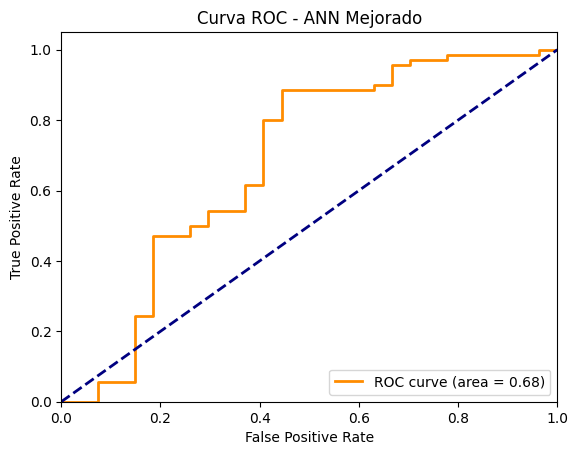

In [123]:
plt.figure()
plt.plot(fprANN, tprANN, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_aucANN)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - ANN Mejorado')
plt.legend(loc="lower right")
plt.show()

Calcular métricas adicionales usando sklearn

In [124]:
accuracyANN = accuracy_score(y_true, y_pred)
precisionANN = precision_score(y_true, y_pred)
recallANN = recall_score(y_true, y_pred)
f1ANN = f1_score(y_true, y_pred)

Almacenar resultados

In [125]:
results_ann = {
    'Modelo': 'ANN Mejorado',
    'AUC': roc_aucANN,
    'Exactitud (Accuracy)': accuracyANN,
    'Sensibilidad (Recall)': recallANN,
    'Precisión (Precision)': precisionANN,
    'Puntuación F1 (F1 Score)': f1ANN,
    'Coeficiente de Gini': giniANN
}

Mostrar resultados

In [126]:
print(f"Modelo 5: Red Neuronal Artificial (ANN Mejorado)\nAUC: {roc_aucANN}\nExactitud (Accuracy): {accuracyANN}\nSensibilidad (Recall): {recallANN}\nPrecisión (Precision): {precisionANN}\nPuntuación F1 (F1 Score): {f1ANN}\nCoeficiente de Gini: {giniANN}")

Modelo 5: Red Neuronal Artificial (ANN Mejorado)
AUC: 0.6835978835978836
Exactitud (Accuracy): 0.7731958762886598
Sensibilidad (Recall): 0.8571428571428571
Precisión (Precision): 0.8333333333333334
Puntuación F1 (F1 Score): 0.8450704225352113
Coeficiente de Gini: 0.3671957671957673


# 🌌 11. Modelo 6: Redes Neuronales Profundas (DNN) (Deep Learning)

Paso 1- Preparar los Datos

Vectorizar las características

In [128]:
assembler = VectorAssembler(inputCols=["feature"], outputCol="features")
vectorized_data = assembler.transform(transformed_dataset)

Normalizar las características

In [129]:
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)
scalerModel = scaler.fit(vectorized_data)
scaled_data = scalerModel.transform(vectorized_data)

Dividir los datos en conjuntos de entrenamiento y prueba

In [130]:
train_data, test_data = scaled_data.randomSplit([0.8, 0.2], seed=42)

Paso 2- Definir y Entrenar el Modelo

Definir la arquitectura de la red neuronal profunda

In [131]:
layers = [22, 128, 256, 128, 64, 2]  # 22 entradas, varias capas ocultas, 2 salidas para clasificación binaria

Inicializar el modelo de MultilayerPerceptronClassifier

In [132]:
mlp = MultilayerPerceptronClassifier(layers=layers, featuresCol='scaledFeatures', labelCol='Loan_Status', maxIter=200)

Crear la grid de hiperparámetros

In [133]:
paramGridDNN = ParamGridBuilder() \
    .addGrid(mlp.maxIter, [200, 300]) \
    .addGrid(mlp.stepSize, [0.01, 0.1]) \
    .addGrid(mlp.blockSize, [128, 256]) \
    .build()

Evaluador

In [134]:
evaluator = BinaryClassificationEvaluator(labelCol='Loan_Status')

CrossValidator

In [135]:
crossvalDNN = CrossValidator(estimator=mlp,
                             estimatorParamMaps=paramGridDNN,
                             evaluator=evaluator,
                             numFolds=5)

Entrenar el modelo usando Cross-Validation

In [136]:
cvModelDNN = crossvalDNN.fit(train_data)

Tiempo espera: 19 mins 2 seg

Paso 3- Realizar Predicciones y Evaluar el Modelo

Realizar predicciones en los datos de prueba

In [137]:
predictionsDNN = cvModelDNN.transform(test_data)

Obtener las etiquetas reales y predichas

In [138]:
y_true = [row['Loan_Status'] for row in predictionsDNN.select('Loan_Status').collect()]
y_pred_prob = [row['probability'][1] for row in predictionsDNN.select('probability').collect()]
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

Calcular AUC (ROC AUC)

In [139]:
fprDNN, tprDNN, _ = roc_curve(y_true, y_pred_prob)
roc_aucDNN = auc(fprDNN, tprDNN)

Calcular Coeficiente de Gini

In [140]:
giniDNN = 2 * roc_aucDNN - 1

Matriz de Confusión

In [141]:
conf_matrixDNN = confusion_matrix(y_true, y_pred)

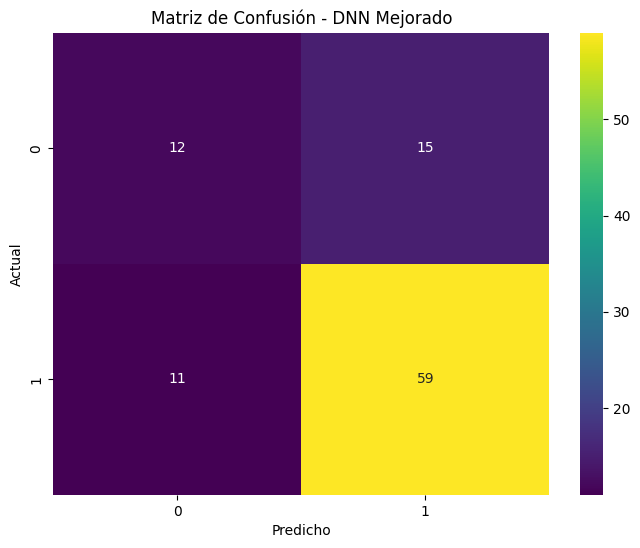

In [142]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrixDNN, annot=True, fmt="d", cmap="viridis")
plt.title("Matriz de Confusión - DNN Mejorado")
plt.ylabel('Actual')
plt.xlabel('Predicho')
plt.show()

Curva ROC

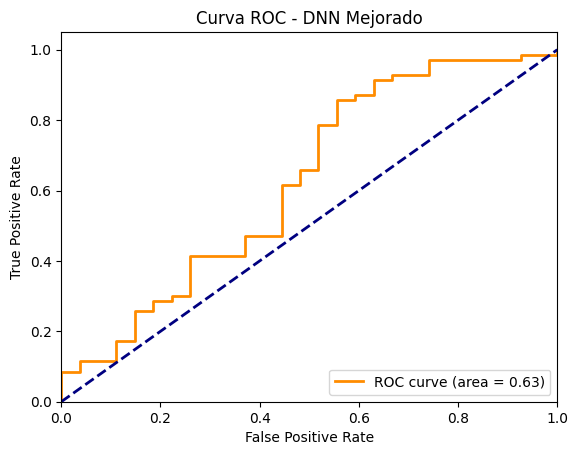

In [143]:
plt.figure()
plt.plot(fprDNN, tprDNN, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_aucDNN)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - DNN Mejorado')
plt.legend(loc="lower right")
plt.show()

Calcular métricas adicionales usando sklearn

In [144]:
accuracyDNN = accuracy_score(y_true, y_pred)
precisionDNN = precision_score(y_true, y_pred)
recallDNN = recall_score(y_true, y_pred)
f1DNN = f1_score(y_true, y_pred)

Almacenar resultados

In [145]:
results_dnn = {
    'Modelo': 'DNN Mejorado',
    'AUC': roc_aucDNN,
    'Exactitud (Accuracy)': accuracyDNN,
    'Sensibilidad (Recall)': recallDNN,
    'Precisión (Precision)': precisionDNN,
    'Puntuación F1 (F1 Score)': f1DNN,
    'Coeficiente de Gini': giniDNN
}

Mostrar resultados

In [146]:
print(f"Modelo 6: Red Neuronal Profunda (DNN Mejorado)\nAUC: {roc_aucDNN}\nExactitud (Accuracy): {accuracyDNN}\nSensibilidad (Recall): {recallDNN}\nPrecisión (Precision): {precisionDNN}\nPuntuación F1 (F1 Score): {f1DNN}\nCoeficiente de Gini: {giniDNN}")

Modelo 6: Red Neuronal Profunda (DNN Mejorado)
AUC: 0.625925925925926
Exactitud (Accuracy): 0.7319587628865979
Sensibilidad (Recall): 0.8428571428571429
Precisión (Precision): 0.7972972972972973
Puntuación F1 (F1 Score): 0.8194444444444444
Coeficiente de Gini: 0.251851851851852


# 📜 12. Modelo 7: Redes Neuronales Recurrentes (RNN) (Deep Learning)

Paso 1- Preparar los datos

Vectorizar las características

In [148]:
assembler = VectorAssembler(inputCols=["feature"], outputCol="features")
vectorized_data = assembler.transform(transformed_dataset)

Normalizar las características

In [149]:
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)
scalerModel = scaler.fit(vectorized_data)
scaled_data = scalerModel.transform(vectorized_data)

Dividir los datos en conjuntos de entrenamiento y prueba

In [150]:
train_data, test_data = scaled_data.randomSplit([0.8, 0.2], seed=42)

Paso 2- Definir y Entrenar el modelo

Definir la arquitectura simulada de la RNN

In [151]:
layers = [22, 128, 128, 128, 64, 2]  # 22 entradas, múltiples capas intermedias simulando una RNN, 2 salidas

Inicializar el modelo de MultilayerPerceptronClassifier

In [152]:
mlp = MultilayerPerceptronClassifier(layers=layers, featuresCol='scaledFeatures', labelCol='Loan_Status', maxIter=200)

Crear la grid de hiperparámetros

In [153]:
paramGridRNN = ParamGridBuilder() \
    .addGrid(mlp.maxIter, [200, 300]) \
    .addGrid(mlp.stepSize, [0.01, 0.1]) \
    .addGrid(mlp.blockSize, [128, 256]) \
    .build()

Evaluador

In [154]:
evaluator = BinaryClassificationEvaluator(labelCol='Loan_Status')

CrossValidator

In [155]:
crossvalRNN = CrossValidator(estimator=mlp,
                             estimatorParamMaps=paramGridRNN,
                             evaluator=evaluator,
                             numFolds=5)

Entrenar el modelo usando Cross-Validation

In [156]:
cvModelRNN = crossvalRNN.fit(train_data)

Tiempo de espera: 13 mins 7 seg

Paso 3- Realizar Predicciones y Evaluar el Modelo

Realizar predicciones en los datos de prueba

In [157]:
predictionsRNN = cvModelRNN.transform(test_data)

Obtener las etiquetas reales y predichas

In [158]:
y_true = [row['Loan_Status'] for row in predictionsRNN.select('Loan_Status').collect()]
y_pred_prob = [row['probability'][1] for row in predictionsRNN.select('probability').collect()]
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

Calcular AUC (ROC AUC)

In [159]:
fprRNN, tprRNN, _ = roc_curve(y_true, y_pred_prob)
roc_aucRNN = auc(fprRNN, tprRNN)

Calcular Coeficiente de Gini

In [160]:
giniRNN = 2 * roc_aucRNN - 1

Matriz de Confusión

In [161]:
conf_matrixRNN = confusion_matrix(y_true, y_pred)

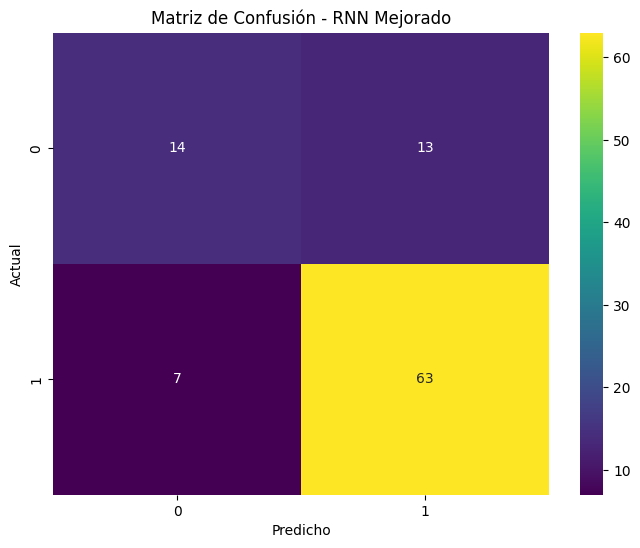

In [162]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrixRNN, annot=True, fmt="d", cmap="viridis")
plt.title("Matriz de Confusión - RNN Mejorado")
plt.ylabel('Actual')
plt.xlabel('Predicho')
plt.show()

Curva ROC

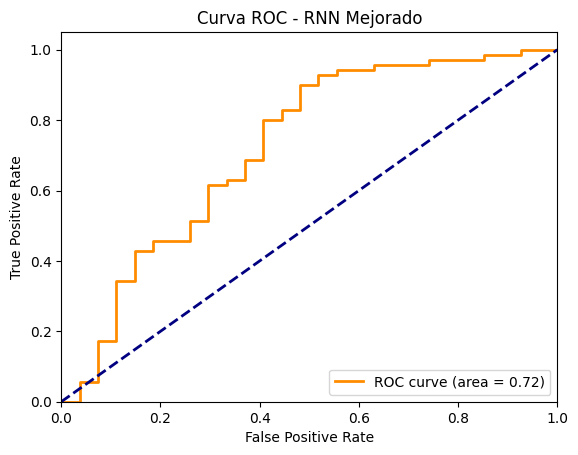

In [163]:
plt.figure()
plt.plot(fprRNN, tprRNN, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_aucRNN)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - RNN Mejorado')
plt.legend(loc="lower right")
plt.show()

Calcular métricas adicionales usando sklearn

In [164]:
accuracyRNN = accuracy_score(y_true, y_pred)
precisionRNN = precision_score(y_true, y_pred)
recallRNN = recall_score(y_true, y_pred)
f1RNN = f1_score(y_true, y_pred)

Almacenar resultados

In [165]:
results_rnn = {
    'Modelo': 'RNN Mejorado',
    'AUC': roc_aucRNN,
    'Exactitud (Accuracy)': accuracyRNN,
    'Sensibilidad (Recall)': recallRNN,
    'Precisión (Precision)': precisionRNN,
    'Puntuación F1 (F1 Score)': f1RNN,
    'Coeficiente de Gini': giniRNN
}

Mostrar resultados

In [166]:
print(f"Modelo 7: Red Neuronal Recurrente (RNN Mejorado)\nAUC: {roc_aucRNN}\nExactitud (Accuracy): {accuracyRNN}\nSensibilidad (Recall): {recallRNN}\nPrecisión (Precision): {precisionRNN}\nPuntuación F1 (F1 Score): {f1RNN}\nCoeficiente de Gini: {giniRNN}")

Modelo 7: Red Neuronal Recurrente (RNN Mejorado)
AUC: 0.7206349206349206
Exactitud (Accuracy): 0.7938144329896907
Sensibilidad (Recall): 0.9
Precisión (Precision): 0.8289473684210527
Puntuación F1 (F1 Score): 0.863013698630137
Coeficiente de Gini: 0.44126984126984126


# 🌐 13. Modelo 8: Redes Neuronales Convolucionales (CNN) (Deep Learning)

Paso 1- Preparar los datos

Vectorizar las características

In [168]:
assembler = VectorAssembler(inputCols=["feature"], outputCol="features")
vectorized_data = assembler.transform(transformed_dataset)

Normalizar las características

In [169]:
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)
scalerModel = scaler.fit(vectorized_data)
scaled_data = scalerModel.transform(vectorized_data)

Dividir los datos en conjuntos de entrenamiento y prueba

In [170]:
train_data, test_data = scaled_data.randomSplit([0.8, 0.2], seed=42)

Paso 2- Definir y Entrenar el Modelo

Definir la arquitectura simulada de la CNN

In [171]:
layers = [22, 256, 128, 64, 2]  # 22 entradas, múltiples capas densas para simular la CNN, 2 salidas

Inicializar el modelo de MultilayerPerceptronClassifier

In [172]:
mlp = MultilayerPerceptronClassifier(layers=layers, featuresCol='scaledFeatures', labelCol='Loan_Status', maxIter=200)

Crear la grid de hiperparámetros

In [173]:
paramGridCNN = ParamGridBuilder() \
    .addGrid(mlp.maxIter, [200, 300]) \
    .addGrid(mlp.stepSize, [0.01, 0.1]) \
    .addGrid(mlp.blockSize, [128, 256]) \
    .build()

Evaluador

In [174]:
evaluator = BinaryClassificationEvaluator(labelCol='Loan_Status')

CrossValidator

In [175]:
crossvalCNN = CrossValidator(estimator=mlp,
                             estimatorParamMaps=paramGridCNN,
                             evaluator=evaluator,
                             numFolds=5)

Entrenar el modelo usando Cross-Validation

In [176]:
cvModelCNN = crossvalCNN.fit(train_data)

Tiempo de espera: 13 mins

Paso 3- Realizar Predicciones y Evaluar el Modelo

Realizar predicciones en los datos de prueba

In [177]:
predictionsCNN = cvModelCNN.transform(test_data)

Obtener las etiquetas reales y predichas

In [178]:
y_true = [row['Loan_Status'] for row in predictionsCNN.select('Loan_Status').collect()]
y_pred_prob = [row['probability'][1] for row in predictionsCNN.select('probability').collect()]
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

Calcular AUC (ROC AUC)

In [179]:
fprCNN, tprCNN, _ = roc_curve(y_true, y_pred_prob)
roc_aucCNN = auc(fprCNN, tprCNN)

Calcular Coeficiente de Gini

In [180]:
giniCNN = 2 * roc_aucCNN - 1

Matriz de Confusión

In [181]:
conf_matrixCNN = confusion_matrix(y_true, y_pred)

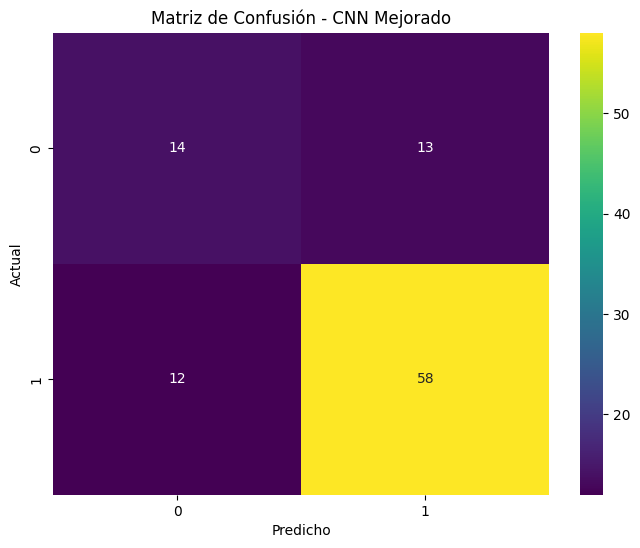

In [182]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrixCNN, annot=True, fmt="d", cmap="viridis")
plt.title("Matriz de Confusión - CNN Mejorado")
plt.ylabel('Actual')
plt.xlabel('Predicho')
plt.show()

Curva ROC

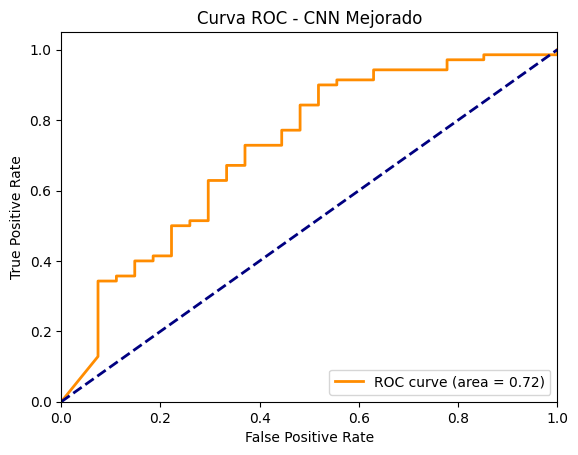

In [183]:
plt.figure()
plt.plot(fprCNN, tprCNN, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_aucCNN)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - CNN Mejorado')
plt.legend(loc="lower right")
plt.show()

Calcular métricas adicionales usando sklearn

In [184]:
accuracyCNN = accuracy_score(y_true, y_pred)
precisionCNN = precision_score(y_true, y_pred)
recallCNN = recall_score(y_true, y_pred)
f1CNN = f1_score(y_true, y_pred)

Almacenar resultados

In [185]:
results_cnn = {
    'Modelo': 'CNN Mejorado',
    'AUC': roc_aucCNN,
    'Exactitud (Accuracy)': accuracyCNN,
    'Sensibilidad (Recall)': recallCNN,
    'Precisión (Precision)': precisionCNN,
    'Puntuación F1 (F1 Score)': f1CNN,
    'Coeficiente de Gini': giniCNN
}

Mostrar resultados

In [186]:
print(f"Modelo 8: Red Neuronal Convolucional (CNN Mejorado)\nAUC: {roc_aucCNN}\nExactitud (Accuracy): {accuracyCNN}\nSensibilidad (Recall): {recallCNN}\nPrecisión (Precision): {precisionCNN}\nPuntuación F1 (F1 Score): {f1CNN}\nCoeficiente de Gini: {giniCNN}")

Modelo 8: Red Neuronal Convolucional (CNN Mejorado)
AUC: 0.719047619047619
Exactitud (Accuracy): 0.7422680412371134
Sensibilidad (Recall): 0.8285714285714286
Precisión (Precision): 0.8169014084507042
Puntuación F1 (F1 Score): 0.8226950354609929
Coeficiente de Gini: 0.4380952380952381


# 📊 14.- Comparacion de modelos

In [226]:
results_comparison = {
    'Modelo': [
        'Modelo 1: Regresión Logística',
        'Modelo 2: Random Forest',
        'Modelo 3: Gradient Boosting',
        'Modelo 4: XGBoost',
        'Modelo 5: ANN',
        'Modelo 6: DNN',
        'Modelo 7: RNN',
        'Modelo 8: CNN'
    ],
    'AUC': [
        roc_aucLR,
        roc_aucRF,
        roc_aucGBT,
        roc_aucXGB,
        roc_aucANN,
        roc_aucDNN,
        roc_aucRNN,
        roc_aucCNN
    ],
    'Exactitud (Accuracy)': [
        accuracyLR,
        accuracyRF,
        accuracyGBT,
        accuracyXGB,
        accuracyANN,
        accuracyDNN,
        accuracyRNN,
        accuracyCNN
    ],
    'Sensibilidad (Recall)': [
        recallLR,
        recallRF,
        recallGBT,
        recallXGB,
        recallANN,
        recallDNN,
        recallRNN,
        recallCNN
    ],
    'Precisión (Precision)': [
        precisionLR,
        precisionRF,
        precisionGBT,
        precisionXGB,
        precisionANN,
        precisionDNN,
        precisionRNN,
        precisionCNN
    ],
    'F1 Score': [
        f1LR,
        f1RF,
        f1GBT,
        f1XGB,
        f1ANN,
        f1DNN,
        f1RNN,
        f1CNN
    ],
    'Coeficiente de Gini': [
        giniLR,
        giniRF,
        giniGBT,
        giniXGB,
        giniANN,
        giniDNN,
        giniRNN,
        giniCNN
    ]
}

Tabla Resultados

In [227]:
results_df = pd.DataFrame(results_comparison)
results_df

,Modelo,AUC,Exactitud (Accuracy),Sensibilidad (Recall),Precisión (Precision),F1 Score,Coeficiente de Gini
0,Modelo 1: Regresión Logística,0.787302,0.835052,0.835052,0.865740,0.808784,0.574603
1,Modelo 2: Random Forest,0.817460,0.824742,0.824742,0.823080,0.808709,0.634921
2,Modelo 3: Gradient Boosting,0.833333,0.793814,0.793814,0.793814,0.793814,0.666667
3,Modelo 4: XGBoost,0.813228,0.824742,0.928571,0.844156,0.884354,0.626455
4,Modelo 5: ANN,0.683598,0.773196,0.857143,0.833333,0.845070,0.367196
5,Modelo 6: DNN,0.625926,0.731959,0.842857,0.797297,0.819444,0.251852
6,Modelo 7: RNN,0.720635,0.793814,0.900000,0.828947,0.863014,0.441270
7,Modelo 8: CNN,0.719048,0.742268,0.828571,0.816901,0.822695,0.438095


## Observaciones

1- AUC:

- El modelo de Gradient Boosting (Modelo 3) presenta el AUC más alto (0.833), lo que indica que es el mejor modelo en términos de capacidad para distinguir entre clases.
- Random Forest (Modelo 2) y XGBoost (Modelo 4) también tienen un AUC elevado, mostrando un buen rendimiento.
- Los modelos de redes neuronales (ANN, DNN, RNN, CNN) presentan AUC más bajos, especialmente el modelo DNN y CNN, lo que podría indicar una menor capacidad de generalización en comparación con los modelos basados en árboles.

2- Exactitud (Accuracy):

- Regresión Logística (Modelo 1) tiene la mayor exactitud (0.835), seguido de cerca por Random Forest (Modelo 2) y XGBoost (Modelo 4).
- La exactitud más baja se observa en DNN (Modelo 6) y CNN (Modelo 8), lo que sugiere que estos modelos pueden no estar bien ajustados a los datos.

3- Sensibilidad (Recall):

- XGBoost (Modelo 4) y RNN (Modelo 7) tienen la mayor sensibilidad, lo que significa que son mejores en la detección de la clase positiva (préstamos aprobados).
- Modelos como Gradient Boosting (Modelo 3) y DNN (Modelo 6) muestran una sensibilidad menor, lo que podría ser preocupante si el objetivo es minimizar los falsos negativos.

4- Precisión (Precision):

- Regresión Logística (Modelo 1) y XGBoost (Modelo 4) muestran una alta precisión, indicando una buena capacidad para reducir los falsos positivos.
- DNN (Modelo 6) y CNN (Modelo 8) tienen una precisión más baja, lo que podría indicar una tendencia a clasificar incorrectamente los préstamos no aprobados como aprobados.

5- F1 Score:

- XGBoost (Modelo 4) tiene el F1 Score más alto, lo que sugiere un buen equilibrio entre precisión y sensibilidad.
- Los modelos Gradient Boosting (Modelo 3) y Random Forest (Modelo 2) también tienen buenos F1 Scores.
- Los modelos basados en redes neuronales presentan F1 Scores más bajos, particularmente DNN (Modelo 6) y CNN (Modelo 8).

6- Coeficiente de Gini:

- El Gradient Boosting (Modelo 3) tiene el coeficiente de Gini más alto (0.667), seguido por Random Forest (Modelo 2), lo que respalda su superioridad en la discriminación entre clases.
- Los modelos basados en redes neuronales presentan coeficientes de Gini más bajos, lo que refuerza la observación de que estos modelos no son los mejores para este conjunto de datos.

## Conclusiones

- Gradient Boosting (Modelo 3) y XGBoost (Modelo 4) destacan como los mejores modelos en términos de rendimiento global, especialmente en términos de AUC, F1 Score, y coeficiente de Gini. Estos modelos serían recomendables para implementar si el objetivo es maximizar la capacidad predictiva del modelo.

- Regresión Logística (Modelo 1) también se desempeña bien, especialmente en precisión y exactitud, lo que lo hace una opción viable si se prefiere un modelo más sencillo y fácilmente interpretable.

- Los modelos basados en Redes Neuronales (ANN, DNN, RNN, CNN) no se desempeñan tan bien en este conjunto de datos, sugiriendo que podrían no ser la mejor opción para este problema específico de clasificación de préstamos.

## Recomendaciones

1- Ajuste de Hiperparámetros: Aunque se ha realizado un tuning básico de los hiperparámetros utilizando ParamGridBuilder y CrossValidator, explorar una gama más amplia de hiperparámetros, o incluso implementar técnicas como la búsqueda en malla (Grid Search) o la optimización bayesiana, podría ayudar a encontrar configuraciones de hiperparámetros que mejoren el rendimiento de los modelos.

2- Aumento de Datos (Data Augmentation): Para modelos de Deep Learning, el aumento de datos podría ser útil, especialmente si los datos disponibles son limitados. Técnicas como el oversampling de la clase minoritaria, la generación sintética de datos utilizando SMOTE, o incluso la generación de nuevas instancias podrían mejorar la capacidad del modelo para generalizar.

3- Implementación de Modelos Ensamblados: Experimentar con la combinación de múltiples modelos (ensamblaje) como Stacking, Bagging o Boosting puede aprovechar las fortalezas de diferentes algoritmos para mejorar el rendimiento global del sistema de predicción.

4- Mayor Profundización en Deep Learning: Para los modelos de Deep Learning (ANN, DNN, RNN, CNN), ajustar la arquitectura de las redes, incluyendo la profundidad (número de capas), la cantidad de neuronas por capa, las funciones de activación, o la tasa de aprendizaje, podría mejorar significativamente su rendimiento. También, técnicas como el Dropout y la Batch Normalization pueden ayudar a reducir el sobreajuste y mejorar la convergencia del modelo.

5- Incorporación de Características Derivadas (Feature Engineering): La creación de nuevas características derivadas de las existentes, utilizando técnicas de Feature Engineering, podría ayudar a mejorar la precisión del modelo. Además, la eliminación de características redundantes o irrelevantes podría simplificar el modelo y mejorar su rendimiento.

6- Evaluación en Conjuntos de Datos Adicionales: Evaluar los modelos en diferentes conjuntos de datos o en escenarios de validación cruzada más complejos (por ejemplo, k-fold cross-validation con más divisiones) podría proporcionar una mejor comprensión de su capacidad de generalización.

7- Pruebas con Modelos Avanzados de Deep Learning: Si los recursos lo permiten, considerar la implementación de modelos más avanzados de Deep Learning, como Transformers o modelos Generative Adversarial Networks (GANs), podría ser una interesante área de exploración, particularmente si se dispone de un conjunto de datos más grande o más variado.